In [1]:
from pathlib import Path
import pandas as pd 
import xml.etree.ElementTree as et 
%matplotlib inline

root_dir_sr = Path("/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDSR/")
root_dir_xml = Path("/mnt/cropmaskperm/unpacked_ard_landsat_downloads/ARDxml/")

scene_paths = sorted(root_dir_sr.glob("*"))
xml_paths = sorted(root_dir_xml.glob("*"))
df_cols = ["cloud_cover", "cloud_shadow", "snow_ice", "fill", "instrument", "level1_collection", "ard_version"]
rows = []


for xml_path in xml_paths:
    
    xtree = et.parse(xml_path)
    tile_meta_ard = list(xtree.getroot())[0][0]
    tile_meta_global = list(xtree.getroot())[1][1]
    dataframe_dict = {}

    element = tile_meta_ard.find("{https://landsat.usgs.gov/ard/v1}"+"tile_grid")
    h = element.attrib['h']
    v = element.attrib['v']
    
    element = tile_meta_global.find("{https://landsat.usgs.gov/ard/v1}"+"wrs")
    path = element.attrib['path']
    row = element.attrib['row']
    
    element = tile_meta_ard.find("{https://landsat.usgs.gov/ard/v1}"+"acquisition_date")
    datetime = pd.to_datetime(element.text, format="%Y-%m-%d")
    
    dataframe_dict.update({'h':h, 'v':v, 'path': int(path), 'row': int(row), 'acquisition_date':datetime})
    
    for col in df_cols:
        element = tile_meta_ard.find("{https://landsat.usgs.gov/ard/v1}"+col)
        if col in ["cloud_cover", "cloud_shadow", "snow_ice", "fill"]:
            element.text = float(element.text)
        dataframe_dict.update({col:element.text})
    rows.append(dataframe_dict)
    
out_df = pd.DataFrame(rows, columns = df_cols.extend(['h','v', 'path', 'row', 'acquisition_date']))

out_df = out_df.set_index("acquisition_date")

out_df['xml_paths'] = xml_paths
out_df['scene_paths'] = scene_paths

# original paths and rows used in (path, row) form
og_path_rows = [(29, 31), (29, 32), (30, 31), (30, 32), (31, 31), (31, 32), (32, 31), (32, 32), (33, 31), (33, 32)]
# below not used yet, unsure which dates correspond to which path rows since this isn't documented in the label metadata
og_dates = pd.to_datetime(["2005/06/20", '2005/07/22', '2005/09/08', '2005/06/27', '2005/08/30', '2005/09/15', '2005/08/05', '2005/09/06', '2005/07/11', '2005/08/28', '2005/07/02', '2005/08/19', '2005/09/20'])
# 2005-07-20 was missing, could be a mistake in the metadata, amybe they meant 2005-07-22

out_df = out_df.loc[og_dates]

out_df = out_df[out_df[['path', 'row']].apply(tuple, axis=1).isin(og_path_rows)]
out_df

,h,v,path,row,cloud_cover,cloud_shadow,snow_ice,fill,instrument,level1_collection,ard_version,xml_paths,scene_paths
acquisition_date,,,,,,,,,,,,,
2005-06-20,015,008,29,31,0.7433,0.0962,0.0030,49.2312,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-06-20,015,009,29,32,0.3617,0.0153,0.0018,23.0621,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-06-20,016,008,29,31,0.1065,0.0272,0.0000,20.1136,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-06-20,016,009,29,32,0.0180,0.0025,0.0000,46.4412,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-07-22,015,008,29,31,0.4730,0.0090,0.0016,48.1110,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-07-22,015,009,29,32,1.2552,0.7000,0.0007,21.9231,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-07-22,016,008,29,31,1.1735,0.6463,0.0000,22.0789,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-09-08,015,008,29,31,0.4539,0.0027,0.0024,46.0910,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-09-08,015,009,29,32,0.3829,0.0468,0.0016,19.8760,TM,01,01,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...,/mnt/cropmaskperm/unpacked_ard_landsat_downloa...


In [2]:
# drops the cloudiest duplicate by keeping the first duplicate. since we sorted by least cloudy to cloudiest
least_cloudy_june_sept_df = out_df['2005-06-20':"2005-09-20"]\
    .sort_values(["fill", "cloud_cover"])\
    .drop_duplicates(['h','v']) 

least_cloudy_june_sept_lst = least_cloudy_june_sept_df['scene_paths'].apply(str).to_list()

In [4]:
least_cloudy_june_sept_df['scene_paths']

acquisition_date
2005-08-28    /mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-08-05    /mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-09-20    /mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-09-15    /mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-07-11    /mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-09-08    /mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-06-20    /mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-09-06    /mnt/cropmaskperm/unpacked_ard_landsat_downloa...
2005-06-20    /mnt/cropmaskperm/unpacked_ard_landsat_downloa...
Name: scene_paths, dtype: object

In [3]:
from cropmask.preprocess import PreprocessWorkflow, setup_dirs
import time
import dask

param_path = "/home/ryan/work/CropMask_RCNN/test_preprocess_config.yaml"

# selected scenes with almost no clouds that occurred as well outside of the frost season as possible (ends in February-March)
scene_list = least_cloudy_june_sept_lst
labels_path = "/mnt/cropmaskperm/external/nebraska_pivots_projected.geojson"

setup_dirs(param_path)

results = []
for scene_path in scene_list:

    wflow = dask.delayed(PreprocessWorkflow)(param_path, scene_path, labels_path)

#     wflow = PreprocessWorkflow(param_path, scene_path, labels_path)
    
    band_list = wflow.yaml_to_band_index()
        
    product_list = wflow.get_product_paths(band_list)
        
    a = wflow.load_meta_and_bounds(product_list)
        
    b = a.stack_and_save_bands()
        
    c = b.tile_scene_and_vector()
    
    result = c.geojsons_to_masks() #not needed for coco conversions tep if using solaris

    results.append(result)
  

# # # https://docs.dask.org/en/stable/delayed-best-practices.html
from dask.distributed import Client

client = Client()  # use dask.distributed by default

x = client.compute(results, scheduler="processes", num_workers=8)  # start computation in the background

/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ryan/miniconda3/envs/cropmask/lib/pyt

In [4]:
x


[<Future: pending, key: geojsons_to_masks-d0900560-5ee5-47d0-b7ec-1379f2dd8da2>,
 <Future: pending, key: geojsons_to_masks-43dc1506-d9fd-4394-8390-71e9a9ec1be2>,
 <Future: pending, key: geojsons_to_masks-16fc9695-ce7b-4587-acdf-eb6f7e74a46c>,
 <Future: pending, key: geojsons_to_masks-5a0c5f37-d745-4582-bb5a-3657cc54bee7>,
 <Future: pending, key: geojsons_to_masks-4af88b91-13a7-4947-bcaa-0688c5a572d8>,
 <Future: pending, key: geojsons_to_masks-8503cbf1-27f8-4685-a8b8-50cda8ea6b37>,
 <Future: pending, key: geojsons_to_masks-05265115-6c23-46f2-9aa2-96235811cfd2>,
 <Future: pending, key: geojsons_to_masks-e54f7f1f-4ae4-4813-b40d-c9523bf16d7d>,
 <Future: pending, key: geojsons_to_masks-fa947a6e-797c-40fc-b66e-7e03398e4ace>]

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


In [9]:
import rioxarray
rioxarray.__version__

'0.0.19'

# Single Case

In [3]:
%load_ext autoreload
%autoreload 2
from cropmask.preprocess import PreprocessWorkflow, setup_dirs
import time
import dask

param_path = "/home/ryan/work/CropMask_RCNN/cropmask/test_preprocess_config.yaml"

# selected scenes with almost no clouds that occurred as well outside of the frost season as possible (ends in February-March)
# scene_list = least_cloudy_june_sept_lst
labels_path = "/mnt/cropmaskperm/external/nebraska_pivots_projected.geojson"

setup_dirs(param_path)
# problem path
wflow = PreprocessWorkflow(param_path, 
                             least_cloudy_june_sept_lst[2],
                             labels_path)

band_list = wflow.yaml_to_band_index()

product_list = wflow.get_product_paths(band_list)

a = wflow.load_meta_and_bounds(product_list)

b = a.stack_and_save_bands()



/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ryan/miniconda3/envs/cropmask/lib/pyt

In [4]:
b.tile_scene_and_vector()

/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Initializing Tiler...
Tiler initialized.
dest_dir: /datadrive/test-ard-june-sept-rgb/tiles/image_tiles
dest_crs will be inferred from source data.
src_tile_size: (512, 512)
tile size units metric: False
Resampling is set to None


0it [00:00, ?it/s]The following warnings were found:
- The file is greater than 512xH or 512xW, it is recommended to include internal overviews

The following errors were found:
- The file is greater than 512xH or 512xW, but is not tiled
2it [00:00, 13.58it/s]

Beginning tiling...
nodata value threshold supplied, filtering based on this percentage.
Checking input data...
COG: False
[1, 2, 3]
Source CRS: EPSG:None
Destination CRS: EPSG:None
Inputs OK.


24it [00:01, 15.88it/s]
0it [00:00, ?it/s]

Tiling complete. Cleaning up...
Done. CRS returned for vector tiling.
Preparing the tiler...
Initialization done.
Num tiles: 24


24it [00:07,  3.07it/s]


to do make issue. _check_crs messes up first proj turns it into second proj

In [5]:
b.vector_tiler.src_crs

CRS.from_wkt('PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378140,298.256999999996,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [6]:
b.vector_tiler.dest_crs

CRS.from_wkt('PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378140,298.256999999996,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [5]:
b.geojsons_to_masks()

  8%|▊         | 2/24 [00:00<00:01, 15.97it/s]

starting label mask generation


100%|██████████| 24/24 [00:01<00:00, 12.00it/s]


Fill values set to [ 828.91725666 1169.46176693 1423.37931677]


In [ ]:
b.raster_tiler.tile_paths

In [ ]:
import rioxarray
rioxarray.open_rasterio(b.raster_tile_paths[0]).rio.nodata

In [ ]:
rioxarray.open_rasterio(b.raster_tile_paths[9]).sel(band=1).plot()

In [ ]:
b.raster_tile_paths[0]

In [10]:
src = rio.open(im_path)

In [13]:
b.meta['crs']

CRS.from_wkt('PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378140,298.256999999996,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [14]:
shp_frame.crs

'PROJCS["Albers",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378140,298.256999999996,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [15]:
src.crs

CRS.from_wkt('PROJCS["unknown",GEOGCS["unknown",DATUM["Unknown_based_on_IAU_1976_ellipsoid",SPHEROID["IAU 1976",6378140,298.257]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [16]:

# polys = list(rio.features.shapes(src.read(), mask=(src.read() == src.nodata), connectivity=4, transform=src.transform))
# nodata_shapes = [shape(poly[0]) for poly in polys]
# boundary = gpd.GeoDataFrame(geometry=[unary_union(nodata_shapes)])
# shp_frame_diffed = gpd.overlay(shp_frame, boundary, how='difference')


In [1]:
import us
from cropmask import io_utils
import rioxarray
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import box
from shapely.ops import unary_union
from shapely.geometry import shape
from geopandas import GeoDataFrame
import geopandas as gpd
shp_frame = gpd.read_file(b.source_label_path)
shp_frame = shp_frame.to_crs(b.meta['crs'])
shp_frame = shp_frame.loc[shp_frame.geometry.area > b.small_area_filter]
shp_series = shp_frame.loc[shp_frame.is_empty==False]
shp_frame = shp_frame.cx[b.bounds.left:b.bounds.right,b.bounds.bottom:b.bounds.top] # might need to clip geometries at nodata edges of image are filtered in instance_mask function
shp_frame.crs = shp_frame.crs.to_wkt()# geopandas can't save dfs with crs in rasterio format

nebraska_url = us.states.NE.shapefile_urls('state')
gdf = io_utils.zipped_shp_url_to_gdf (nebraska_url)
crs=xarray.open_rasterio(wflow.scene_path).rio.crs
bounds_poly = gdf.to_crs(src.crs)['geometry'].iloc[0]

NameError: name 'b' is not defined

In [18]:
im_path = Path("/datadrive/test-ard-june-sept-rgb/scene/").glob("*")[0]
src = rasterio.open(im_path)
polys = list(rasterio.features.shapes(src.read(), mask=(src.read() == src.nodata), connectivity=4, transform=src.transform))
nodata_shapes = [shape(poly[0]) for poly in polys]
boundary = gpd.GeoDataFrame(geometry=[unary_union(nodata_shapes)])

shp_frame = gpd.overlay(shp_frame, boundary, how='difference')

In [19]:
bounds_gdf = gdf.to_crs(src.crs)
bounds_gdf_edge = bounds_gdf.copy()
bounds_gdf_edge['geometry'] = bounds_gdf_edge.geometry.buffer(5000)
bounds_gdf_edge = gpd.overlay(bounds_gdf_edge, bounds_gdf, how='difference')
#gpd.overlay(shp_frame, bounds_gdf_edge, how='difference')

/home/ryan/miniconda3/envs/cropmask/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [56]:
im_box_gdf = gpd.GeoDataFrame(geometry = [box(src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top)], crs = src.crs)
im_box_edge = im_box_gdf.copy()
im_box_edge['geometry'] = im_box_gdf.geometry.buffer(5000)
im_box_edge = gpd.overlay(im_box_edge, im_box_gdf, how='difference')
shp_frame2 = gpd.overlay(shp_frame, im_box_edge, how='difference')

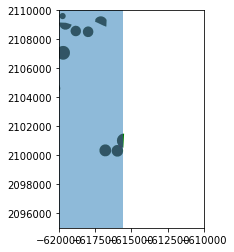

In [68]:
fig, ax = plt.subplots()
ax.set_ylim([2095000, 2110000])
ax.set_xlim([-620000, -610000])
# bounds_gdf_edge.plot(ax=ax, color="red")
# bounds_gdf.plot(ax=ax)
shp_frame.plot(ax=ax, color="green")
im_box_gdf.plot(ax=ax, alpha=.5)
shp_frame2.plot(ax=ax, color="purple", alpha = .3)

In [ ]:
shp_frame_diffed.plot()


In [ ]:
shp_frame.loc[shp_frame.is_valid==False, 'geometry'] = shp_frame[shp_frame.is_valid==False].buffer(0) # fix self intersections so that there is no topology error

In [ ]:
gpd.read_file("/mnt/cropmaskperm/")

In [ ]:
import us
from cropmask import io_utils
import xarray
import rioxarray
nebraska_url = us.states.NE.shapefile_urls('state')
gdf = io_utils.zipped_shp_url_to_gdf (nebraska_url)
crs=xarray.open_rasterio(wflow.scene_path).rio.crs
bounds_poly = gdf.to_crs(crs)['geometry'].iloc[0]

In [ ]:
bounds_poly

In [ ]:
from shapely.geometry import box
mask_geometry = bounds_poly.intersection(box(*src.bounds))

In [ ]:
import geopandas
ex = geopandas.read_file("/datadrive/test-ard-june-sept-rgb/tiles/geojson_tiles/"+"LT05_CU_012008_20050920_20190107_C01_V0_-625097_2038539.geojson")

In [ ]:
import us
from cropmask import io_utils
import xarray
import rioxarray
nebraska_url = us.states.NE.shapefile_urls('state')
gdf = io_utils.zipped_shp_url_to_gdf (nebraska_url)
crs=xarray.open_rasterio(wflow.scene_path).rio.crs
bounds_poly = gdf.to_crs(crs)['geometry'].iloc[0]

from shapely.geometry import box
mask_geometry = bounds_poly.intersection(box(*src.bounds))

In [ ]:
from rasterio import mask
import numpy as np
index_lst = np.arange(1,src.meta['count']+1)
arr, t = mask.mask(src, [mask_geometry], all_touched=False, invert=False, nodata=src.meta['nodata'], 
                         filled=True, crop=True, pad=False, pad_width=0.5, indexes=list(index_lst))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
rast.where(rast>0).plot.imshow(ax=ax, robust=True)
label.any(axis=0).where(label.any(axis=0)>0).plot.imshow(ax=ax, alpha=.5, add_colorbar=False)
# for i in np.arange(label.shape[0]):
#     label[i].plot.imshow(ax=ax, alpha=.5, add_colorbar=False)

code graveyard, shape preserving tiling but non uniform shapes

In [ ]:
from shapely.geometry import box, Polygon, MultiPolygon, GeometryCollection

def katana(geometry, approx_tile_size, use_projection_size=False, transform=None, recursion_max = 5000, count = 0):
    """Split a Polygon into two parts across it's shortest dimension
    
    Arguments
    ---------
    geometry : str, optional
        A shapely.geometry.Polygon, path to a single feature geojson, 
    or list-like bounding box shaped like [left, bottom, right, top]
    src_tile_size : `tuple` of `int`s, optional
        The size of the input tiles in ``(y, x)`` coordinates. By default,
        this is in pixel units; this can be changed to metric units using the
        `use_metric_size` argument.
    use_metric_size : bool, optional
        Is `src_tile_size` in pixel units (default) or metric? To set to metric
        use ``use_metric_size=True``.
    transform : `tuple` of `int`s, optional
        A rasterio transform.
    
    Adapted from @lossyrob's Gist https://gist.github.com/lossyrob/7b620e6d2193cb55fbd0bffacf27f7f2
    
    
    """
    if isinstance(geometry, str):
        gj = json.loads(open(geometry).read())
        features = gj['features']
        if not len(features) == 1:
            print('Feature collection must only contain one feature')
            sys.exit(1)
        geometry = shape(features[0]['geometry'])
        
    elif isinstance(geometry, list) or isinstance(geometry, np.ndarray):
        assert len(geometry) == 4
        geometry = box(*geometry)
    
    elif isinstance(geometry, (Polygon, MultiPolygon)) is False:
        print("geometry must be one of type list, numpy.ndarray or shapely.geometry.Polygon")
        return
    
    bounds = geometry.bounds
    width = bounds[2] - bounds[0]
    height = bounds[3] - bounds[1]
    if use_projection_size is False:
        if transform is None:
            print("""Error: A transform is needed to convert pixel units to 
                  projection units if use_projection_size is False""")
            return
        approx_tile_size = approx_tile_size * transform[0]
    if max(width, height) <= approx_tile_size or count == recursion_max:
        # either the max dimesnion of the polygon is smaller than the threshold, 
        # or the maximum number of recursions has been reached
        return [geometry]
    if height >= width:
        # split left to right
        a = box(bounds[0], bounds[1], bounds[2], bounds[1]+height/2)
        b = box(bounds[0], bounds[1]+height/2, bounds[2], bounds[3])
    else:
        # split top to bottom
        a = box(bounds[0], bounds[1], bounds[0]+width/2, bounds[3])
        b = box(bounds[0]+width/2, bounds[1], bounds[2], bounds[3])
    result = []
    for d in (a, b,):
        c = geometry.intersection(d)
        if not isinstance(c, GeometryCollection):
            c = [c]
        for e in c:
            if isinstance(e, (Polygon, MultiPolygon)):
                result.extend(katana(e, approx_tile_size, count=count+1, use_projection_size=use_projection_size, transform=transform))
    if count > 0:
        return result
    # convert multipart into singlepart
    final_result = []
    for g in result:
        if isinstance(g, MultiPolygon):
            final_result.extend(g)
        else:
            final_result.append(g)
    return final_result

In [ ]:
shapes = katana(neb, 15360, use_projection_size = True)

gpd.GeoDataFrame(geometry=[neb]).plot()


gpd.GeoDataFrame(geometry=shapes)[400:401].area

In [ ]:
import dask
lst = [1,2,3,4,5,6]
output_lst = []
for i in lst:
    output_lst.append(dask.delayed(sum)([i,1]))
results = dask.compute(*output_lst)

results

In [ ]:
import geopandas as gpd
f = gpd.read_file("/mnt/cropmaskperm/external/nebraska_pivots_projected.geojson")
f.crs

import xarray
import rioxarray
crs = xarray.open_rasterio(list(Path(scene_path).glob("*"))[6]).rio.crs

crs

f.crs = crs

f = f.to_crs(crs)

f.crs